In [1]:
# import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:/Users/Advance/Downloads/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

In [9]:
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


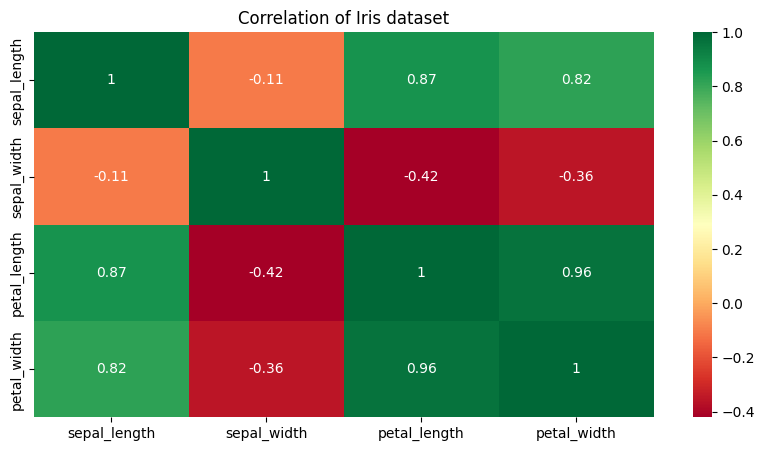

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
print("Number of Rows", df.shape[0])
print("Number of Columns :" , df.shape[1])

Number of Rows 150
Number of Columns : 5


In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [15]:
#Check Null values
missing = df.isnull().sum().sort_values(ascending = False)
missing

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df.duplicated().sum()

3

In [17]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

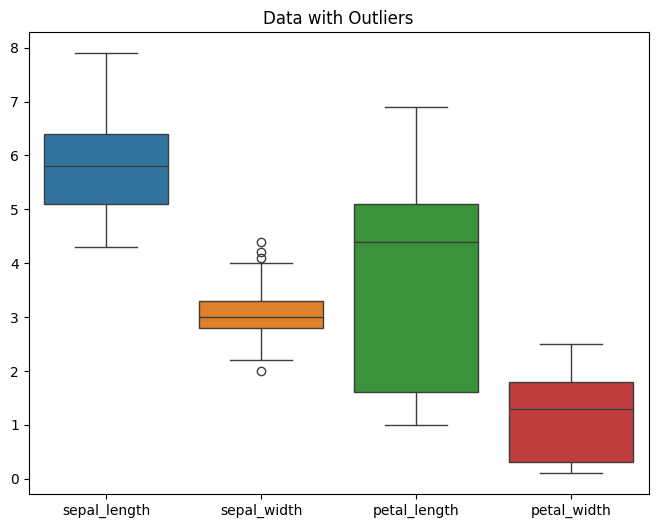

In [18]:
# Visualize the data before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show()

In [23]:
X = df.drop(['species'], axis=1)
y = df['species']

In [24]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create model 
lg = LogisticRegression()

#Fit the model
clf = lg.fit(X_train, y_train)

In [26]:
# Predict the model
y_pred = clf.predict(X_test)

In [27]:
#Evaluate the model
print("Accuracy Score : ", accuracy_score(y_test, y_pred))


Accuracy Score :  0.9333333333333333


In [28]:
#Print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [29]:
#Save model
import pickle

with open('iris_model.pkl', 'wb') as file:
    pickle.dump(clf, file)